<a href="https://colab.research.google.com/github/nitesh-singh-datascience/team-power-telecom-churn-analysis/blob/Rishabh/Copy_of_Rishabh_Kumar_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **PROBLEM SOLVING APPROACH AND WAYS TO MOVE FORWARD:**

Hello ,
I am Rishabh ,and this is my first capstone project in the form of 'EDA'.
I have decided to do this in 4 steps as breaking down a problem is very 
important . It gives us power over complexities of any problem that we 
are trying to solve.

1.Understanding of the problem : I have to figure out key factors responsible for customer churn out of the dataset that i have been provided with.

2.Analyzing the dataset given,check if its clean or needs cleaning and 
then proceed with further processing.

3.Graphically getting a view of relations that exist among factors of the
given dataset.

4.Understand which relationship stands out more and impacts more on the 
given dataset. And recommend ways to improve those metrics.

# Importing required libraries to make sure we get to use inbuilt functions availabe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Copy of Telecom Churn.csv'

In [ ]:
df=pd.read_csv(path)

# Getting a overall picture of the data available:

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Analyzing and plotting overall churn distribution as this is our main
# factor in relation to which we have to do our analysis:

**What is Customer Churn Analysis?**

AN EDA over a specific dataset which provide insight over 3 important aspects:

1.Why are customers churning?

2.How do you identify which customers are going to churn in the coming time?

3.What should you do to minimize churn?

Churn analysis helps in determining the trend of customer attrition

# PLOT 1

There are several factors that are similar like the charges and minutes

for different category.

So to understand the relation among them i plotted a 
Correlation Heatmap.



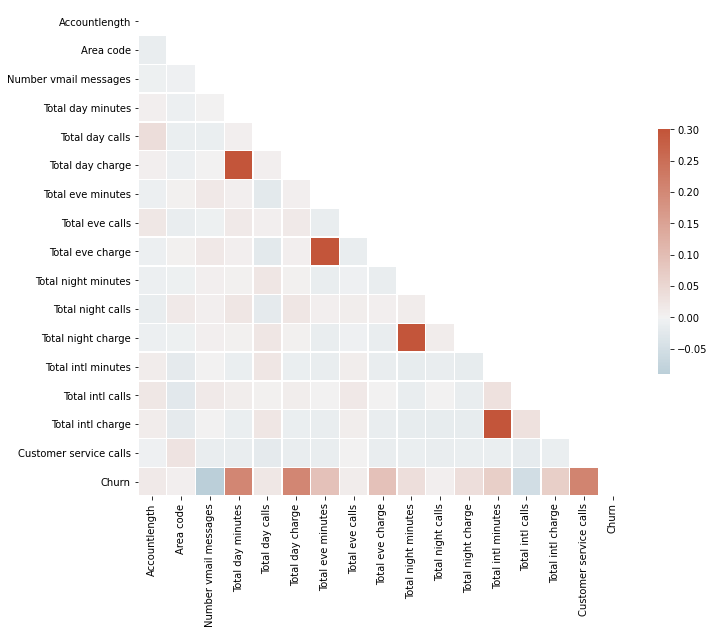

In [ ]:
#Get Correlation of "Churn" with other variables:
corr = df.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heat map we can see charge and minutes length are highly correlated .

That means they are linearly moving in same direction so 

in such scenarios not all of them will contribute highly to the 

problem we have . 

The single parameter that is higher will do the same work.

# PLOT 2 :A 
CHURN VS DAY_MIN

CHURN VS ACCOUNT LENGTH

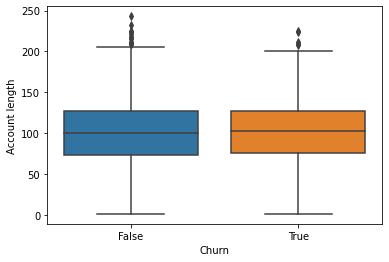

In [ ]:
sns.boxplot(x='Churn', y='Account length', data=df)

# Almost same distribution in churn and non-churn customers,thus 

# indicating that account length is not a driving factor here in this 

# dataset.

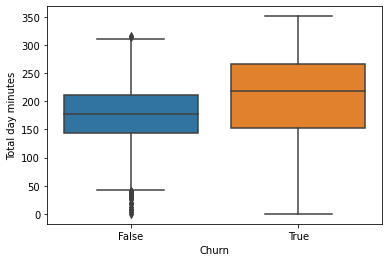

In [ ]:
sns.boxplot(x='Churn', y='Total day minutes', data=df)

# PLOT 2:B
CHURN VS EVE_MIN

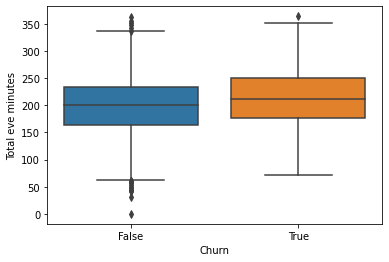

In [ ]:
sns.boxplot(x='Churn', y='Total eve minutes', data=df)

# PLOT 2:C
CHURN VS NIG_MIN

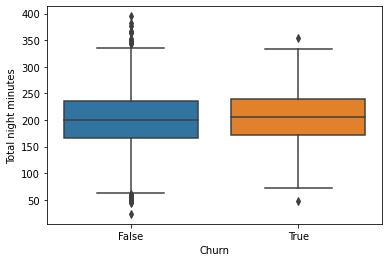

In [ ]:
sns.boxplot(x='Churn', y='Total night minutes', data=df)

# PLOT 2:D
CHURN VS INTL_MIN

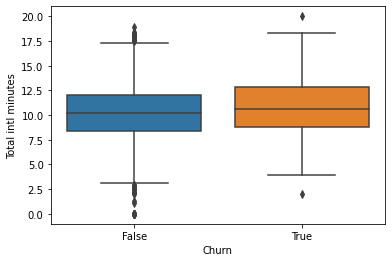

In [ ]:
sns.boxplot(x='Churn', y='Total intl minutes', data=df)

# OBSERVATION:
Only plot 2 A has significant variation when compared to rest of call timing.

And also from heatmap its clear that call length and charges are highly 

positive coorelated so same degree of growth or impact will be there 

and thus any more significant feature alone will represent or drive 

the churn factor.


#The heatmap does not clear any relation between Total day calls,

# Total evening calls, etc with respect to the churn so , its important to

# clearly see how these are distributed and how they are driving churn rate.

# PLOT 3:A

CHURN VS TOTAL DAY CALLS

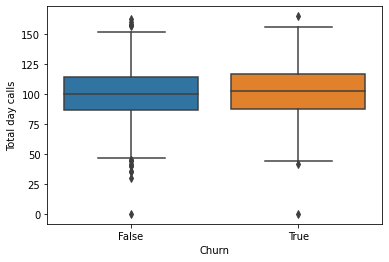

In [ ]:
sns.boxplot(x='Churn', y='Total day calls', data=df)

# PLOT 3:B
CHURN VS TOTAL EVE CALLS

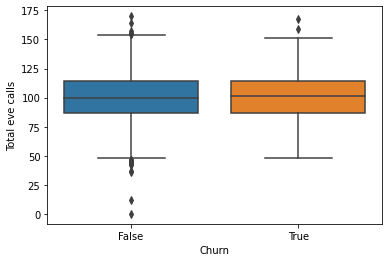

In [ ]:
sns.boxplot(x='Churn', y='Total eve calls', data=df)

# PLOT 3:C
CHURN VS TOTAL NIGHT MIN

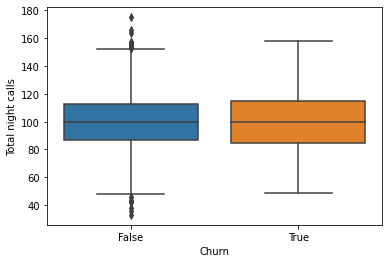

In [ ]:
sns.boxplot(x='Churn', y='Total night calls', data=df)

# PLOT 3:D

CHURN VS TOTAL INTL CALLS

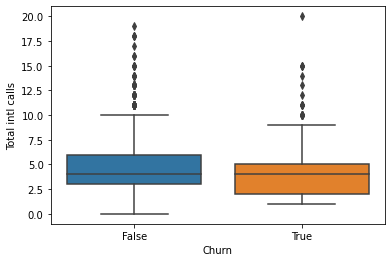

In [ ]:
sns.boxplot(x='Churn', y='Total intl calls', data=df)

# OBSERVATION:

The total number of calls is roughly the same across churn and non-churn population.

Thus the 4 factors viz:
1. Total day calls
2.Total eve calls
3.Total night calls
4.Total intl calls

doen't play a driving role when it comes to solve our problem that

is our churn rate responsible factors.

# PLOT 4

CHURN DISTRIBUTION

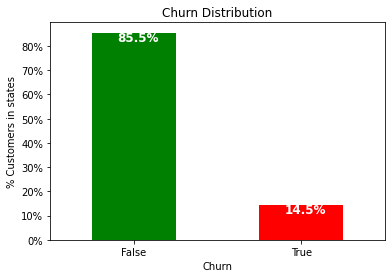

In [ ]:
colors = ['green','red']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers in states')
ax.set_xlabel('Churn')
ax.set_ylabel('% Customers in states')
ax.set_title('Churn Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
# get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

From above graph we can see (Red=Churn ) 
Almost 14% customers churn over the given dataset.

# Plotting to understand distribution of several factors:

# PLOT 5

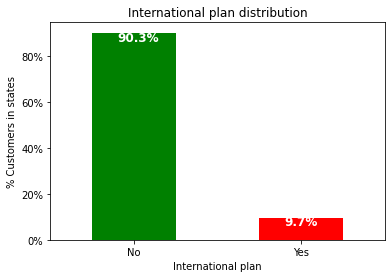

In [ ]:
colors = ['green','red']
ax = (df['International plan'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers in states')
ax.set_xlabel('International plan')
ax.set_ylabel('% Customers in states')
ax.set_title('International plan distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
# get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

# Plotting Churn vs International Plan to understand how significant this
# factor is:

# Churn Vs International plan

# PLOT 6

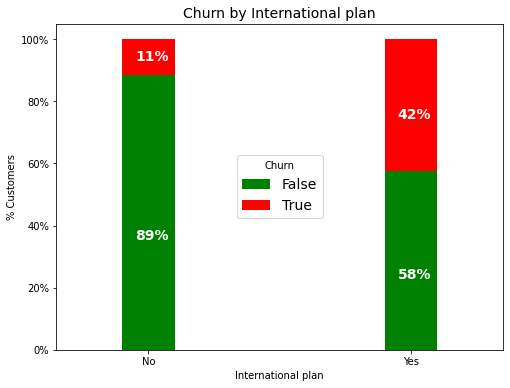

In [ ]:
colors = ['green','red']
seniority_churn = df.groupby(['International plan','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,
rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by International plan',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

The figure above shows the % of churn across(red = churned) those who have intl plan and those who don't.

 churn % on the International plan is 4(approx) times the those who are not on international plan. 


# Understanding Churn vs Customer service calls:

# PLOT 7

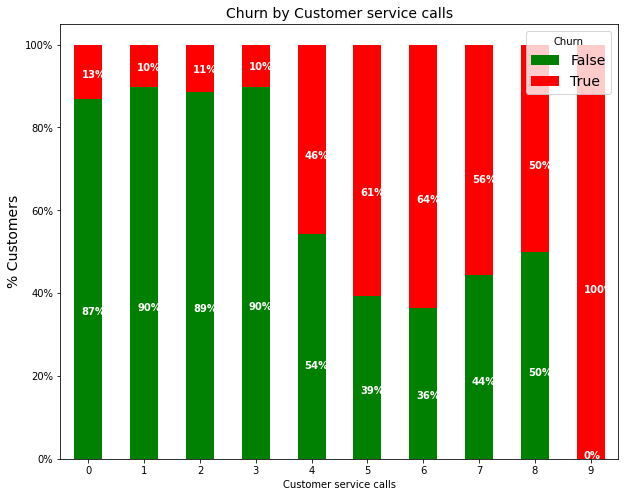

In [ ]:
colors = ['green','red']
contract_churn = df.groupby(['Customer service calls','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
width = 0.5, stacked = True, rot = 0, figsize = (10,8),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Customer service calls',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

A significant spike in churn can be seen from above figure  as customer calls increases beyond 4 customer calls.

After 3 service calls its rises to range greater than 50%.


# Understanding churn vs voice mail plan:

# PLOT 8

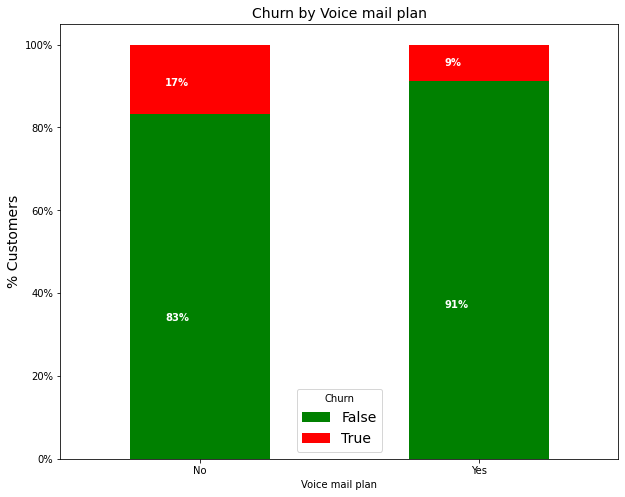

In [ ]:
colors = ['green','red']
contract_churn = df.groupby(['Voice mail plan','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.5,stacked = True, rot = 0, figsize = (10,8),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Voice mail plan',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

From the above plot we can observe that voice mail plan almost has same 

distribution range in both churn and non-churn 

customers.

Thus a low impact feature when it comes to driving churn rate.

# My Learnings:

**1. The mathematical concepts of understanding how different features work in a given datsets greatly helped pointing towards correlation**.

**2. Some of the features which are directly playing a significant role in churn rate are**

A. Customer service calls

B. International Plans

C. Total day minutes

# MY CONCLUSION:

1.THE FOCUS ON SERVICE RESOLUTION CAN BE IMPROVED BY ALLOTING MULTIPLE AND ACTIVE SERVICE INFORMATION REGARDING WHICH THE COMPLAINT WAS REGISTRED.

2.SERVICE PROVIDERS MUST REGULARIZE THE INTERNATIONAL CONNECTIVITY AND SEVERAL OTHER METHODS LIKE :

A. OFFERING ELUSIVE SCHEMES

B. EXPANDING SERVICE AREA IN FOREIGN LANDS FOR BETTER COVERAGE .

C. BANDS UPGARDATION.



In [ ]:
new_df=df[['Churn','Customer service calls']]

In [ ]:
new_df

,Churn,Customer service calls
0,False,1
1,False,1
2,False,0
3,False,2
4,False,3
...,...,...
3328,False,2
3329,False,3
3330,False,2
3331,False,2


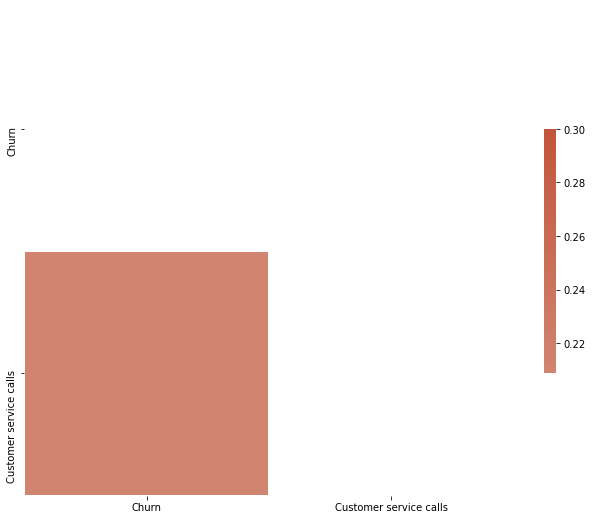

In [ ]:
#Get Correlation of "Churn" with other variables:
corr = df.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})